## Minimum intensity, postnatal development, plot over time

Here the minimum intensity is plotted over time during postnatal development. Additionally, some functions were written to automatically annotate significant results from a posthoc Tukey test.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../")
from quapos_lm import significant_tukey_results, x_coordinate, asterics

In [2]:
# Define path were measurements are stored
stats_path = "../../measurements/wt-postnatal-development/"

# Define path were plots should be stored
save_path = "../../plots-images/quapos-paper/sup-fig-3-plots/"

In [3]:
# Load measurements
measurements = pd.read_csv(stats_path + "08-measurements-processed.csv")
measurements

,biol_repl,label,age,maximum,mean,median,minimum,sigma,sum,variance,...,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled,summed_volume_mean
0,1.0,83.000000,8.0,572.072487,276.999939,253.902252,153.514021,89.207799,89571.470370,12483.492986,...,1.135134,3.933802,6.961996,2.731891,1.404112,29.530795,30.166599,13.218529,8.938100,828.629153
1,2.0,74.333333,8.0,642.001611,293.921538,264.767499,153.492252,105.143326,100047.019958,16892.070744,...,1.169092,4.117962,6.532768,2.525268,1.426223,28.903283,25.224753,12.442629,9.116965,808.983063
2,3.0,83.000000,8.0,623.870848,291.964848,263.895176,157.205173,100.655201,82353.442963,14736.391053,...,1.138754,4.040329,6.290170,2.441629,1.356562,26.698815,21.851104,10.956077,8.114211,672.190565
3,4.0,85.666667,8.0,510.612076,233.010028,210.645494,123.954499,80.458537,79526.650194,10597.408317,...,1.174022,4.137301,6.858062,2.631444,1.437465,29.956208,28.430755,13.691870,9.468924,832.021445
4,5.0,146.333333,10.0,426.188669,223.960324,207.407505,130.204908,66.522749,43070.950822,6669.229487,...,1.013614,3.286424,5.561892,2.154343,1.245811,19.189221,14.266504,7.558345,5.741588,870.516099
5,6.0,166.666667,10.0,444.097340,234.782142,217.308213,138.078292,69.767190,42249.313234,7139.497653,...,0.987452,3.279710,5.149347,2.033763,1.145403,17.112630,11.779800,6.650701,5.277719,881.490501
6,7.0,214.333333,10.0,296.683127,156.582861,145.243371,90.576198,46.134377,29081.355276,3095.411320,...,1.012850,3.374919,5.403251,2.149089,1.176140,18.805765,12.986054,7.247627,5.646304,1241.747441
7,8.0,203.000000,12.0,708.948804,327.162766,294.613773,173.749242,115.357722,97428.128465,20513.213634,...,1.116399,3.803847,6.773311,2.672986,1.404390,27.737735,27.493027,12.148407,8.218802,1837.532801
8,9.0,199.333333,12.0,802.868097,351.689919,312.281348,175.014586,134.624877,125284.872246,27550.673411,...,1.158854,3.807037,7.248914,2.823805,1.498450,30.254949,31.855411,13.854024,9.532479,2130.831284
9,10.0,159.666667,12.0,367.077671,200.070006,186.465406,119.939012,56.161829,39004.644993,4832.335376,...,1.000518,3.372486,5.349196,2.109050,1.168569,19.182869,14.767607,7.450016,5.722417,925.455507


### Compute significant Tukey results

A function will be applied which computes Tukey results and filters groups which are statistically significant. The function is based on the `pairwise_tukeyhsd` function from the `statsmodels.stats.multicomp` package.

In [4]:
# Compute significant tukey results
significance = significant_tukey_results(dataframe=measurements,
                                         x="age",
                                         y="minimum")
significance

,group1,group2,meandiff,p-adj,lower,upper,reject
8,10.0,16.0,63.3815,0.0285,4.7834,121.9797,True
9,10.0,20.0,62.5830,0.0314,3.9848,121.1811,True
10,10.0,24.0,70.1603,0.0125,11.5622,128.7584,True
14,12.0,24.0,55.7445,0.0282,4.2772,107.2118,True


### Calculate the mean minimum intensity per age

Since I do not like the line markerstyle from `seaborn`. The mean values will be calculated with `.groupby("age")` and manually added to the plot using `plt.hlines()`.

In [5]:
# Determine mean values
means = measurements.groupby('age', as_index=False)['minimum'].mean()

### Compute plot representing the means of each age

Now a plot is drawn which shows:

- mean minimum intensity per age
- the standard error of the mean per age
- the single datapoints which were used to determine the average/sem
- statistical significance

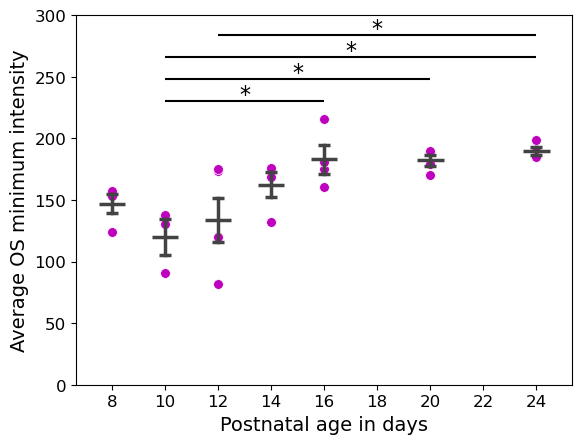

In [6]:
# Draw a line plot without line
lineplot = sns.lineplot(data=measurements,
                        x="age",
                        y="minimum",
                        linestyle="",
                        errorbar="se",
                        err_style = "bars",
                        color="#434343",
                        err_kws={"capsize": 4, "linewidth": 2.5, "capthick": 2.5})

# Draw a scatterplot
sns.scatterplot(data=measurements,
                x="age",
                y="minimum",
                color="m",
                s=50)

# Adjust Y axis
plt.ylim(0, 300)
plt.ylabel("Average OS minimum intensity", fontsize=14)
plt.yticks(fontsize=12)

# Adjust X axis
ticks = [8, 10, 12, 14, 16, 18, 20, 22, 24]
plt.xlabel("Postnatal age in days", fontsize=14)
plt.xticks(ticks = ticks, labels = ticks, fontsize=12)

# Add mean values
for index, row in means.iterrows():
    
    # Plot mean values as a line
    plt.hlines(y=row["minimum"], xmin=row["age"]-0.5, xmax=row["age"]+0.5, linewidth=2.5, color="#434343", linestyle="-")

# Adjust title
#plt.title("OS number over time", loc="left", fontsize=14)

# Define y position for significance annotation, and distance between significant lines
y_position = 230
distance = 18

# Draw the annotation into the plot
for index, row in significance.iterrows():
    
    # Store significant pairs in respective variables
    group_1, group_2 = row["group1"], row["group2"]
    
    # Determine significance stars for annotation
    asteric_values = asterics(row=row, column_name="p-adj")
    
    # Determine x_position of the asteric
    x_position = x_coordinate(xmin=group_1, xmax=group_2)
    
    # Draw the line as well as the asteric
    lineplot.text(x_position, y_position, asteric_values, fontsize=16, ha="center")
    lineplot.hlines(y=y_position, xmax=group_1, xmin=group_2, color="k")
    
    # Update y_position
    y_position = y_position + distance
    
plt.savefig(save_path + "03-a-minimum-lineplot.png",
            dpi=300,
            bbox_inches="tight",
            transparent=False)